<a href="https://colab.research.google.com/github/aldiirianto/praktikum-machinelearning/blob/main/Analisa_Persentase_Perokok_RI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Guidance Menganalisa Jumlah Persentase Perokok RI Tahun 2015 - 2016**
###Tujuan panduan ini adalah untuk mengeksplor dataset Persentase Perokok RI yang diperoleh dari situs [kaggle.com](https://www.kaggle.com/lintangwisesa/persentase-perokok-di-indonesia-bps-20152016) .

##**1. Data Exploration**

Tahapan pertama yang perlu dilakukan adalah mengeksplor dataset dari file Persentase Perokok RI serta memperhatikan label - label penting yang terdapat dalam data tersebut.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#panggil dataset yang telah disimpan di Google Drive pribadi
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
#explore the dataset
dataset = pd.read_csv('/content/drive/My Drive/Machine Learning/dataset/Persentase Perokok RI.csv')
dataset

,Provinsi,2015,2016
0,ACEH,29.82,28.16
1,SUMATERA UTARA,29.15,27.88
2,SUMATERA BARAT,32.41,30.59
3,RIAU,31.21,29.61
4,JAMBI,30.82,29.18
5,SUMATERA SELATAN,33.13,31.57
6,BENGKULU,33.68,33.15
7,LAMPUNG,34.12,33.39
8,KEP. BANGKA BELITUNG,30.70,29.32
9,KEP. RIAU,29.18,29.25


In [ ]:
dataset.shape

(34, 3)

In [ ]:
dataset.head()

,Provinsi,2015,2016
0,ACEH,29.82,28.16
1,SUMATERA UTARA,29.15,27.88
2,SUMATERA BARAT,32.41,30.59
3,RIAU,31.21,29.61
4,JAMBI,30.82,29.18


Disini, kita mempunyai dataset jumlah persentasi perokok dari 34 provinsi di Indonesia dalam periode waktu tahun 2015 - 2016. Kami akan menampilkan bagaimana perbandingan jumlah persentase perokok RI pada kurun waktu tersebut.

##**2. Data Cleaning**

Tahapan kedua adalah data cleaning yang bertujuan untuk membersihkan data  - data yang tidak dibutuhkan dalam kegiatan menganalisa kali ini.

**- Removing Unwanted Columns**

In [94]:
dataset.columns

Index(['Provinsi', '2015', '2016'], dtype='object')

Dapat dilihat bahwa, ketiga kolom diatas merupakan kolom - kolom yang akan kita jadikan sampel untuk kegiatan menganalisa kali ini. Sehingga, tidak ada kolom yang tidak akan kami gunakan.

**- Handling Duplicate Entries**

Terkadang, terdapat duplikasi data masukan yang tersedia di dataset. Sehingga, diperlukan tahapan pengecekan duplikasi data masukan agar menjadikan bahan yang kita gunakan lebih baik.

In [6]:
dataset.duplicated().sum()

0

Dapat kita lihat bahwa tidak terdapat duplikasi data masukkan di dalam dataset. Sehingga, kegiatan data cleaning dapat dilanjutkan.

**- Handling Missing Values**

In [9]:
dataset.isnull().sum()

Provinsi    0
2015        0
2016        0
dtype: int64

In [11]:
dataset

,Provinsi,2015,2016
0,ACEH,29.82,28.16
1,SUMATERA UTARA,29.15,27.88
2,SUMATERA BARAT,32.41,30.59
3,RIAU,31.21,29.61
4,JAMBI,30.82,29.18
5,SUMATERA SELATAN,33.13,31.57
6,BENGKULU,33.68,33.15
7,LAMPUNG,34.12,33.39
8,KEP. BANGKA BELITUNG,30.70,29.32
9,KEP. RIAU,29.18,29.25


34 rows x 3 columns

Dapat kita bahwa, tidak terdapat data kosong di dataset. Sehingga, kegiatan data cleaning dapat dilanjutkan.


In [13]:
#handling unnatural values

In [14]:
#check minimum value
dataset.min()

Provinsi     ACEH
2015        22.96
2016        21.62
dtype: object

In [31]:
#check maximum value
dataset.max()

Provinsi    SUMATERA UTARA
2015                 34.12
2016                 33.39
dtype: object

In [18]:
#check the range possibilites values, and remove the unnatural values
dataset = dataset[dataset['2015']<100]
dataset

,Provinsi,2015,2016
0,ACEH,29.82,28.16
1,SUMATERA UTARA,29.15,27.88
2,SUMATERA BARAT,32.41,30.59
3,RIAU,31.21,29.61
4,JAMBI,30.82,29.18
5,SUMATERA SELATAN,33.13,31.57
6,BENGKULU,33.68,33.15
7,LAMPUNG,34.12,33.39
8,KEP. BANGKA BELITUNG,30.70,29.32
9,KEP. RIAU,29.18,29.25


In [19]:
dataset = dataset[dataset['2016']<100]
dataset

,Provinsi,2015,2016
0,ACEH,29.82,28.16
1,SUMATERA UTARA,29.15,27.88
2,SUMATERA BARAT,32.41,30.59
3,RIAU,31.21,29.61
4,JAMBI,30.82,29.18
5,SUMATERA SELATAN,33.13,31.57
6,BENGKULU,33.68,33.15
7,LAMPUNG,34.12,33.39
8,KEP. BANGKA BELITUNG,30.70,29.32
9,KEP. RIAU,29.18,29.25


34 rows x 3 columns

Dapat kita lihat bahwa, kita masih mempunyai data persentase perokok tahun 2015 - 2016 di 34 provinsi yang valid untuk tetap dilanjutkan kegiatan menganalisis.

**- Handling Outliers**

Aturan yang digunakan untuk mengecek apakah terdapat data pencilan dalam dataset yang akan kita analisa adalah sebagai berikut :

     jika skew >+ 1 or <- 1 = terdapat data pencilan (outlier)

In [21]:
#check the result if there are outliers present
dataset.skew()

2015   -0.249943
2016   -0.245933
dtype: float64

Dapat kita lihat bahwa, pada setiap kolom tersebut tidak terdapat kehadiran data pencilan karena **nilai skew** masih dalam batas normal.

Sehingga, proses data cleaning berakhir dan didapatkan data valid untuk persentase jumlah perokok di 34 provinsi di Indonesia pada tahun 2015 dan 2016.

##**3. Exploratory Analytics**

###**Use Data Visualization**

####**Multivariate Analysis**

Dalam tahapan ini, kita ingin mengecek bagaimana hubungan antara jumlah persentase perokok RI di tahun 2015 dan 2016. 

In [91]:
dataset.head(6)

,Provinsi,2015,2016
0,ACEH,29.82,28.16
1,SUMATERA UTARA,29.15,27.88
2,SUMATERA BARAT,32.41,30.59
3,RIAU,31.21,29.61
4,JAMBI,30.82,29.18
5,SUMATERA SELATAN,33.13,31.57


In [26]:
dataset.columns

Index(['Provinsi', '2015', '2016'], dtype='object')

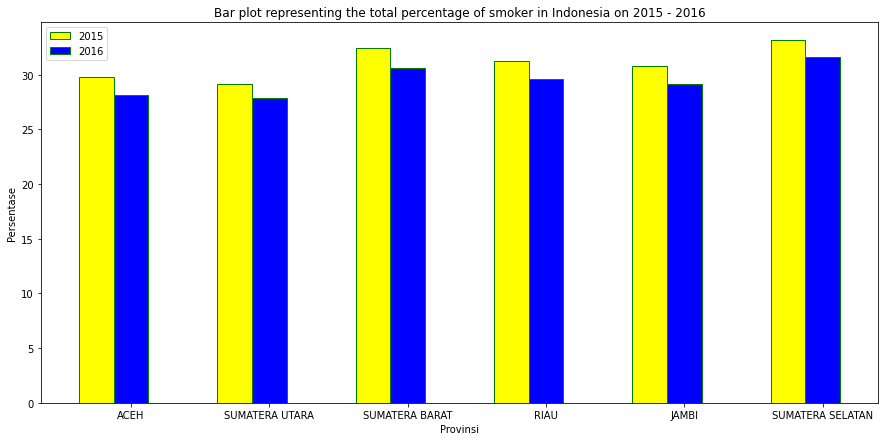

In [92]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize = (15,7))
# Categorical data: Province names
province = dataset['Provinsi']
# Integer value interms of percentage counts
persentase1 = dataset['2015'].head(6)
persentase2 = dataset['2016'].head(6)
# Using numpy to group 3 different data with bars
X = np.arange(len(persentase1))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
plt.bar(X, persentase1, color = 'yellow', width = 0.25, edgecolor = 'green')
plt.bar(X + 0.25, persentase2, color = 'blue', width = 0.25, edgecolor = 'green')
# Creating the legend of the bars in the plot
plt.legend(['2015', '2016'])
# Overiding the x axis with the country names
plt.xticks([i + 0.25 for i in range(6)], province)
# Giving the tilte for the plot
plt.title("Bar plot representing the total percentage of smoker in Indonesia on 2015 - 2016")
# Namimg the x and y axis
plt.xlabel('Provinsi')
plt.ylabel('Persentase')
# Saving the plot as a 'png'
plt.savefig('4BarPlot.png')
# Displaying the bar plot
plt.show()

##**Kesimpulan**

Berdasarkan grafik bar plot diatas, disimpulkan bahwa keenam provinsi (Aceh, Sumatera Utara, Sumatera Barat, Riau, Jambi dan Sumatera Selatan) di Indonesia mengalami penurunan jumlah persentase perokok di  tahun 2016 jika dibandingkan dengan tahun sebelumnya.

Hal tersebut dikarenakan sudah mulai kesadaran akan bahaya rokok sendiri di masyarakat serta adanya penetapan pajak rokok untuk pendanaan pelayanan kesehatan masyarakat yang ditetapkan oleh Menteri Kesehatan pada Permenkes Nomor 40 Tahun 2016 tentang Petunjuk Teknis Penggunaaan Pajak Rokok Untuk Pendanaan Pelayanan Kesehatan Masyarakat, sebagai upaya untuk menurunkan jumlah perokok di Indonesia.